# ***Brain Stroke Prediction Model***

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv(r"C:\Users\mitta\OneDrive\Desktop\Stroke_Prediction\Brain_stroke_dataset.csv")
data.shape

(43400, 12)

In [8]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


There are total 12 columns and 43400 rows in this dataset.  
The target variable is *stroke*. (0-No stroke, 1-Stroke)  
Thus, it is a **Binary Classification** model.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [10]:
data.describe(include="all")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,43400.000000,43400,43400.000000,43400.000000,43400.000000,43400,43400,43400,43400.000000,41938.000000,30108,43400.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,3,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,25665,NaN,NaN,NaN,27938,24834,21756,NaN,NaN,16053,NaN
mean,36326.142350,NaN,42.217894,0.093571,0.047512,NaN,NaN,NaN,104.482750,28.605038,NaN,0.018041
std,21072.134879,NaN,22.519649,0.291235,0.212733,NaN,NaN,NaN,43.111751,7.770020,NaN,0.133103
min,1.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.000000,10.100000,NaN,0.000000
25%,18038.500000,NaN,24.000000,0.000000,0.000000,NaN,NaN,NaN,77.540000,23.200000,NaN,0.000000
50%,36351.500000,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.580000,27.700000,NaN,0.000000
75%,54514.250000,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,112.070000,32.900000,NaN,0.000000


# EDA (Exploratory Data Analysis)

stroke
0    42617
1      783
Name: count, dtype: int64


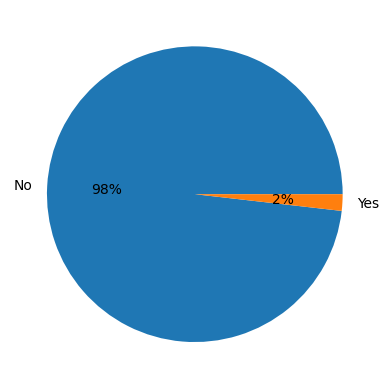

In [11]:
stroke = data['stroke'].value_counts()
print(stroke)
keys = ['No','Yes']
explode = [0,0]
plt.pie(stroke, labels=keys,explode=explode,autopct='%.0f%%')
plt.show()

This pie chart shows that this dataset is *highly imbalanced*.

In [12]:
numerical_cols = ['age','avg_glucose_level','bmi'] 
categorical_cols = ['gender', 'heart_disease','hypertension','ever_married', 'work_type', 'Residence_type',
                       'Smoking_status','stroke']

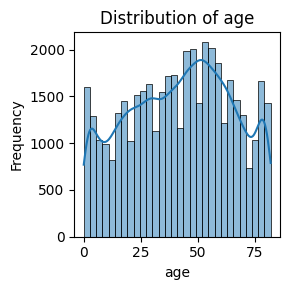

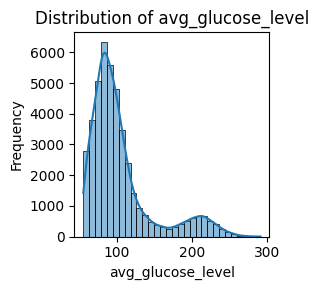

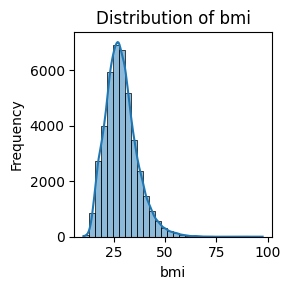

In [13]:
for col in numerical_cols:
    plt.figure(figsize=(3,3))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

These graphs show the distribution of data for numerical columns present in our dataset.  
The **age distribution** is relatively balanced, which is good for model training.

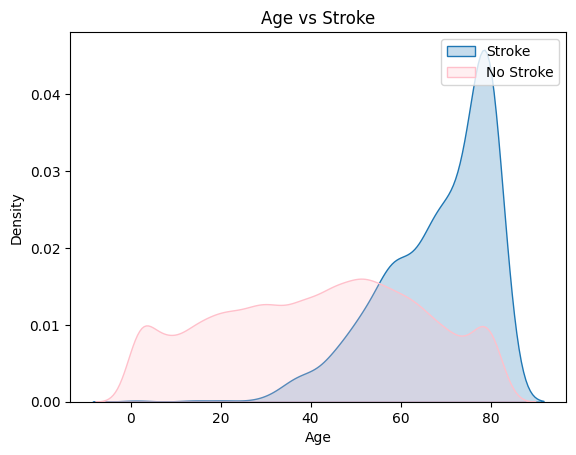

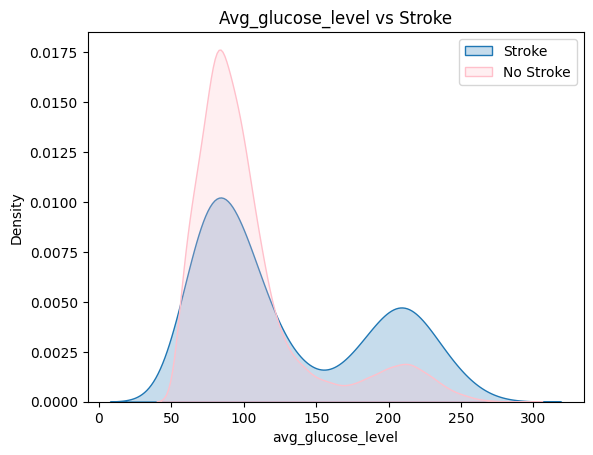

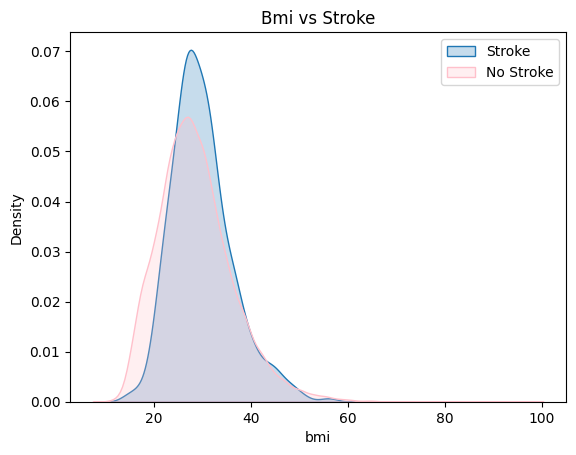

In [14]:
sns.kdeplot(data.loc[data['stroke'] == 1]['age'], label='Stroke', fill=True)
sns.kdeplot(data.loc[data['stroke'] == 0]['age'], label='No Stroke', fill=True,color='pink')
plt.title('Age vs Stroke')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

sns.kdeplot(data.loc[data['stroke'] == 1]['avg_glucose_level'], label='Stroke', fill=True)
sns.kdeplot(data.loc[data['stroke'] == 0]['avg_glucose_level'], label='No Stroke', fill=True,color='pink')
plt.title('Avg_glucose_level vs Stroke')
plt.xlabel('avg_glucose_level')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

sns.kdeplot(data.loc[data['stroke'] == 1]['bmi'], label='Stroke', fill=True)
sns.kdeplot(data.loc[data['stroke'] == 0]['bmi'], label='No Stroke', fill=True,color='pink')
plt.title('Bmi vs Stroke')
plt.xlabel('bmi')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

Value counts for gender:
gender
Female    25665
Male      17724
Other        11
Name: count, dtype: int64



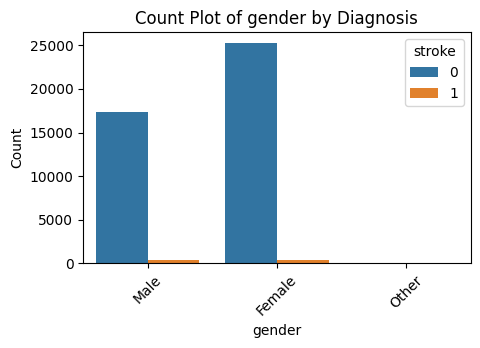

Value counts for heart_disease:
heart_disease
0    41338
1     2062
Name: count, dtype: int64



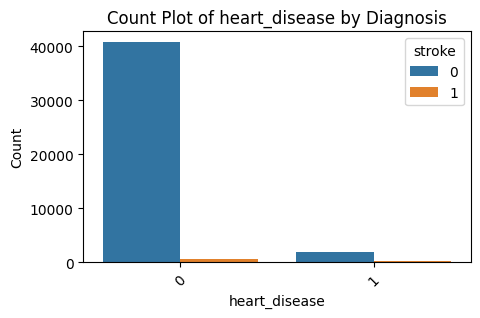

Value counts for hypertension:
hypertension
0    39339
1     4061
Name: count, dtype: int64



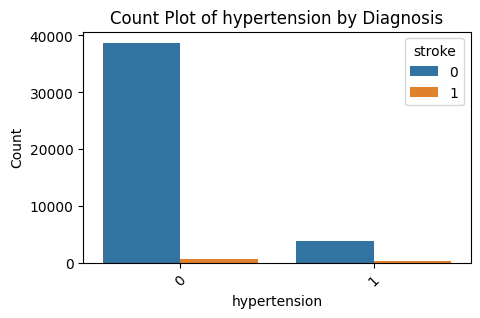

Value counts for ever_married:
ever_married
Yes    27938
No     15462
Name: count, dtype: int64



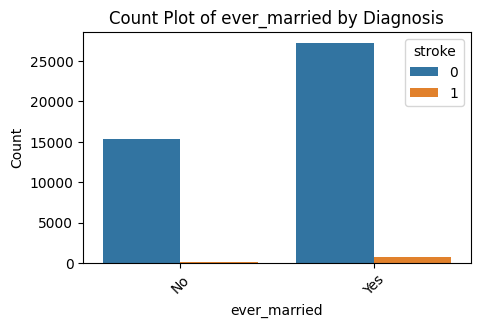

Value counts for work_type:
work_type
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: count, dtype: int64



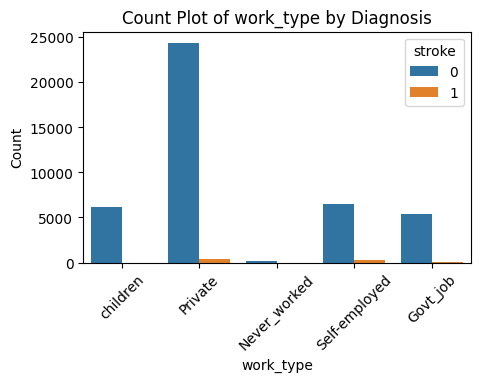

Value counts for Residence_type:
Residence_type
Urban    21756
Rural    21644
Name: count, dtype: int64



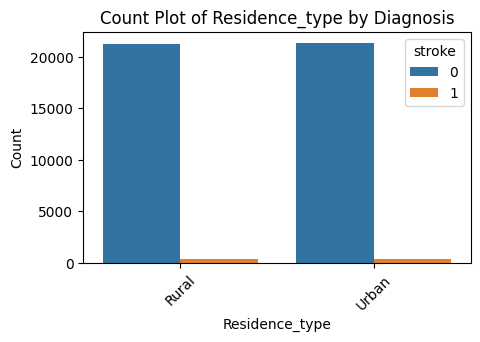

Value counts for stroke:
stroke
0    42617
1      783
Name: count, dtype: int64



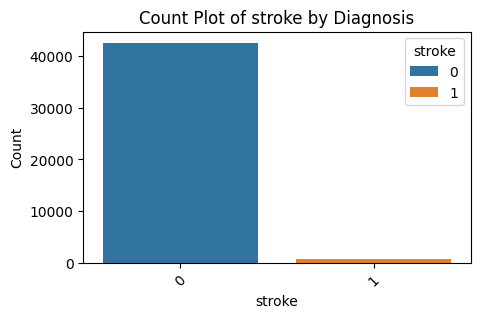

In [15]:
for col in categorical_cols:
    if col in data.columns:
        print(f'Value counts for {col}:\n{data[col].value_counts()}\n')
        plt.figure(figsize=(5,3))
        sns.countplot(x=col, hue='stroke', data=data)
        plt.title(f'Count Plot of {col} by Diagnosis')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.legend(title='stroke')
        plt.xticks(rotation=45)
        plt.show()

# Dropping Columns

The **id** column has no role in prediction of stroke, so we can remove it.

In [16]:
data = data.drop(columns=['id'])
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


# Handling Null Values

In [17]:
data.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

**bmi** is a numerical column, thus we will use the mean to fill null values of this column.  
**smoking_status** is a categorical column , thus we will use mode of the unique values of this column to fill the null values.

In [18]:
# BMI (Fill missing values using mean)
data.fillna({'bmi': data['bmi'].mean()}, inplace=True)

In [19]:
data['smoking_status'].mode()

0    never smoked
Name: smoking_status, dtype: object

In [20]:
#Smoking_status (Fill missing values with mode)
data.fillna({'smoking_status': data['smoking_status'].mode()[0]}, inplace=True)

In [21]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Handling Outliers

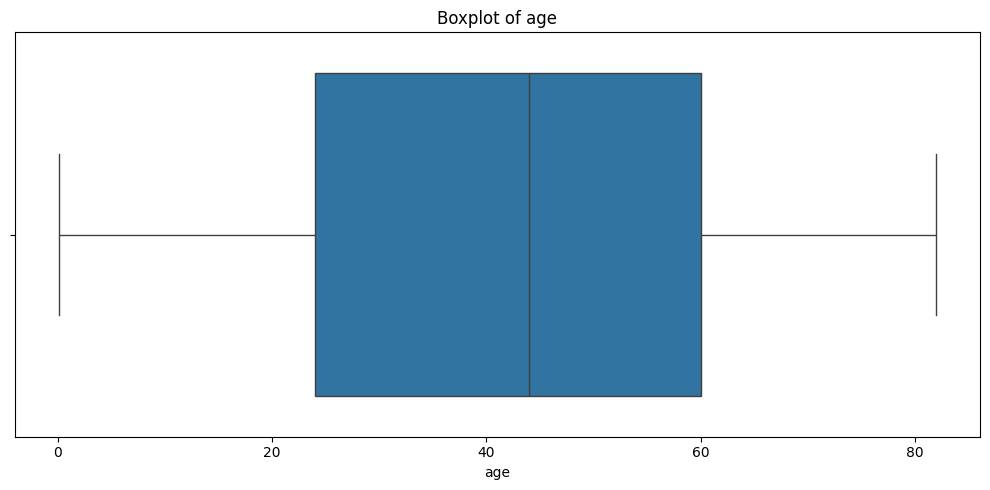

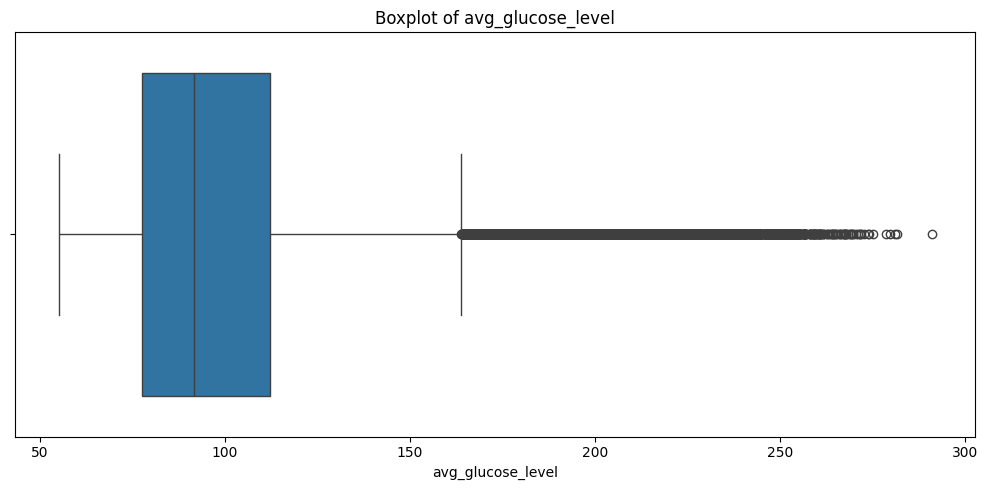

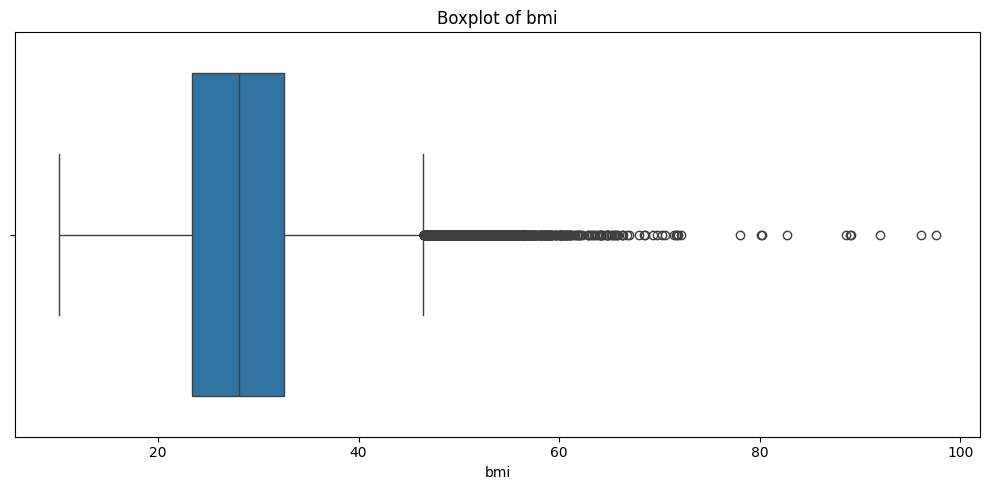

In [22]:
def plot_boxplot(data, feature):
    plt.figure(figsize=(10,5))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
    plt.show()

plot_boxplot(data, 'age')
plot_boxplot(data, 'avg_glucose_level')
plot_boxplot(data, 'bmi')

**avg_glucose_level** and **bmi** columns have a large number of outliers.  
Removing these rows won't be a good option, therefore we will cap the outliers.  
Using interquartile range (IQR) , we can cap all the upper and lower outliers.

In [23]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outliers_age, age_lower, age_upper = detect_outliers_iqr(data, 'age')
outliers_bmi, bmi_lower, bmi_upper = detect_outliers_iqr(data, 'bmi')
outliers_glucose, glucose_lower, glucose_upper = detect_outliers_iqr(data, 'avg_glucose_level')

print(f"Age Outliers: {len(outliers_age)}")
print(f"BMI Outliers: {len(outliers_bmi)}")
print(f"Glucose Outliers: {len(outliers_glucose)}")

Age Outliers: 0
BMI Outliers: 1084
Glucose Outliers: 4978


In [24]:
data['avg_glucose_level'] = np.where(data['avg_glucose_level'] > glucose_upper, glucose_upper,
                                   np.where(data['avg_glucose_level'] < glucose_lower, glucose_lower, data['avg_glucose_level']))

data['bmi'] = np.where(data['bmi'] > bmi_upper, bmi_upper,
                                   np.where(data['bmi'] < bmi_lower, bmi_lower, data['bmi']))


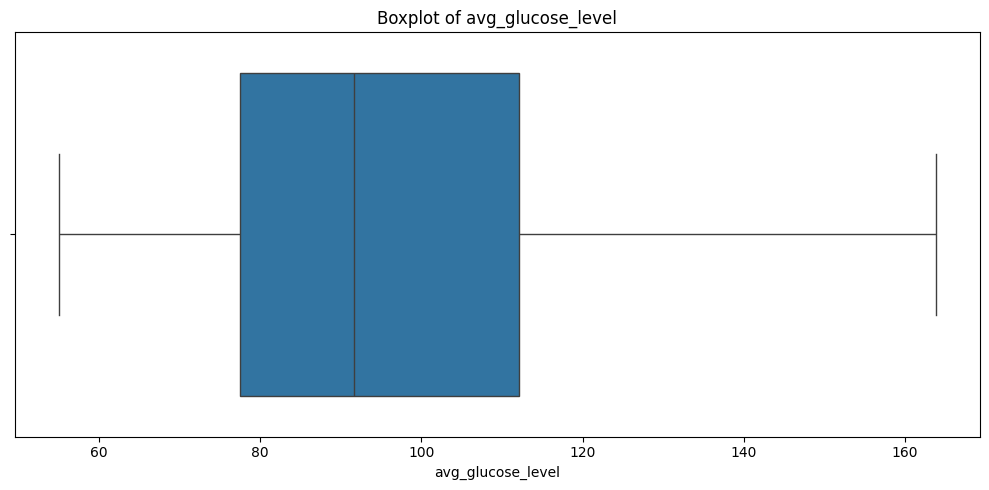

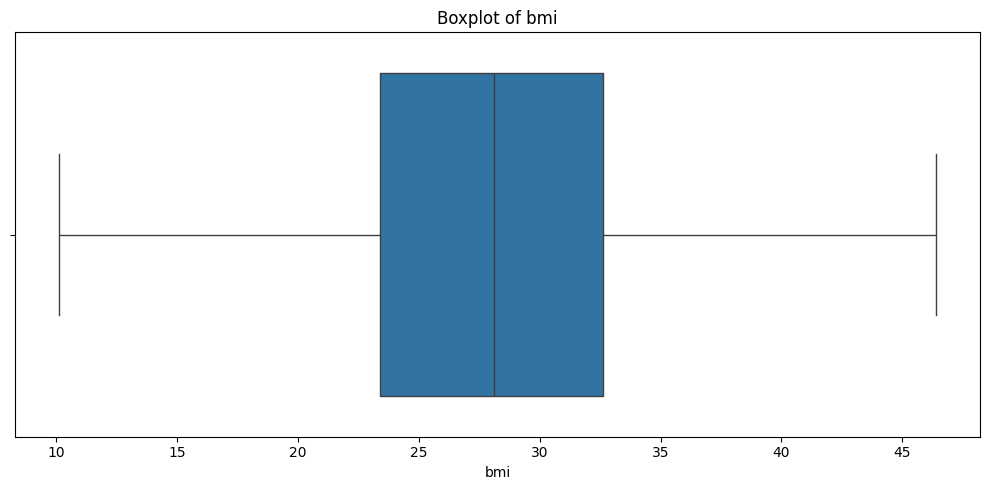

In [25]:
def plot_boxplot(data, feature):
    plt.figure(figsize=(10,5))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
    plt.show()

plot_boxplot(data, 'avg_glucose_level')
plot_boxplot(data, 'bmi')

In [26]:
outliers_bmi, bmi_lower, bmi_upper = detect_outliers_iqr(data, 'bmi')
outliers_glucose, glucose_lower, glucose_upper = detect_outliers_iqr(data, 'avg_glucose_level')

print(f"BMI Outliers: {len(outliers_bmi)}")
print(f"Glucose Outliers: {len(outliers_glucose)}")

BMI Outliers: 0
Glucose Outliers: 0


# Label Encoding

The string values of categorical columns like *gender*, *ever_married*, etc need to be converted into numerical values, for the machine to understand them.  
We will use *Label Encoding* to give particular values to all the unique values of these features.

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
encoded_cols = ['gender','ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [29]:
label_encoder = LabelEncoder()
label_mappings = {}
for col in encoded_cols:
    data[col] = label_encoder.fit_transform(data[col])
    label_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Mapping for column '{col}':")
    for original, encoded in mapping.items():
        print(f"  {original}: {encoded}")

Mapping for column 'gender':
  Female: 0
  Male: 1
  Other: 2
Mapping for column 'ever_married':
  No: 0
  Yes: 1
Mapping for column 'work_type':
  Govt_job: 0
  Never_worked: 1
  Private: 2
  Self-employed: 3
  children: 4
Mapping for column 'Residence_type':
  Rural: 0
  Urban: 1
Mapping for column 'smoking_status':
  formerly smoked: 0
  never smoked: 1
  smokes: 2


In [30]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0,0,0,4,0,95.12,18.0,1,0
1,1,58.0,1,0,1,2,1,87.96,39.2,1,0
2,0,8.0,0,0,0,2,1,110.89,17.6,1,0
3,0,70.0,0,0,1,2,0,69.04,35.9,0,0
4,1,14.0,0,0,0,1,0,161.28,19.1,1,0


# Correlation Heatmap

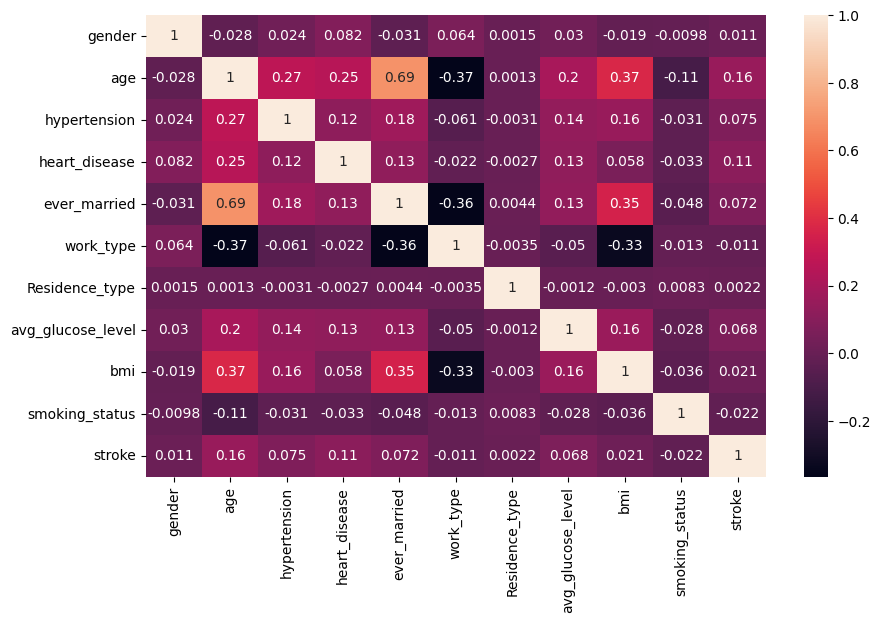

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data.corr(), ax=ax, annot=True)
plt.show()

# Splitting the dataset

In [32]:
X = data.drop(columns=['stroke'])
y = data['stroke']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(34720, 10)
(8680, 10)
(34720,)
(8680,)


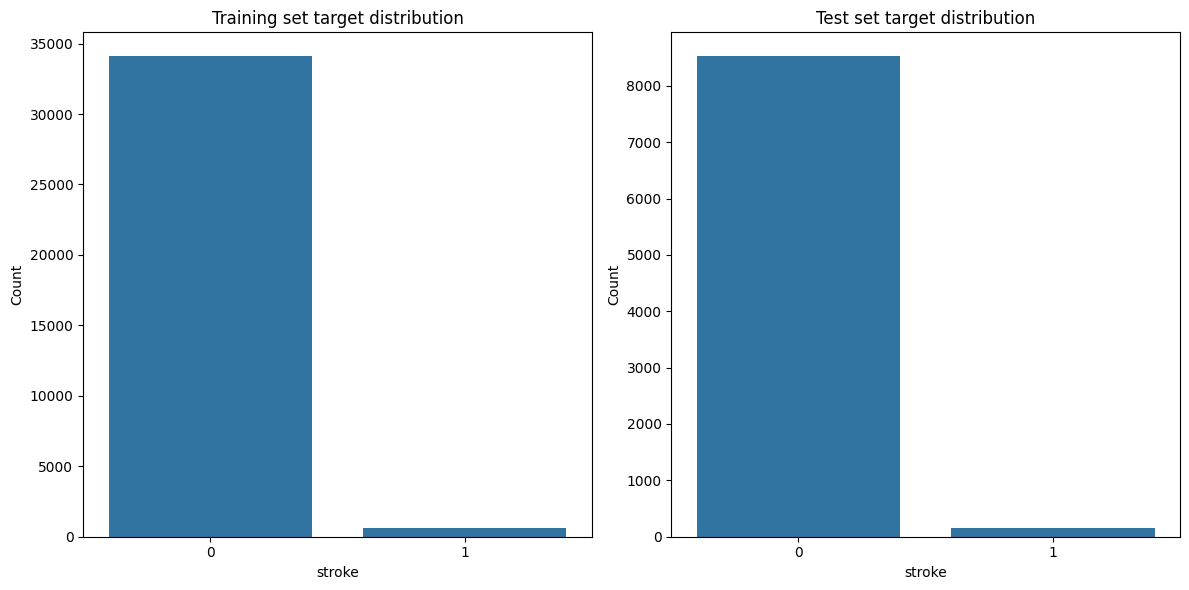

In [35]:
def plot_target_distribution(y_train, y_test):
    fig, axes = plt.subplots(1,2, figsize=(12,6))
    #training set
    sns.countplot(x=y_train, ax=axes[0])
    axes[0].set_title('Training set target distribution')
    axes[0].set_xlabel('stroke')
    axes[0].set_ylabel('Count')
    #testing set
    sns.countplot(x=y_test, ax=axes[1])
    axes[1].set_title('Test set target distribution')
    axes[1].set_xlabel('stroke')
    axes[1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()
plot_target_distribution(y_train, y_test)

# Handling imbalance data
## Oversampling using SMOTE

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
smote_enn = SMOTE(random_state=42)

X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train)

In [38]:
y_train_res.value_counts()

stroke
0    34094
1    34094
Name: count, dtype: int64

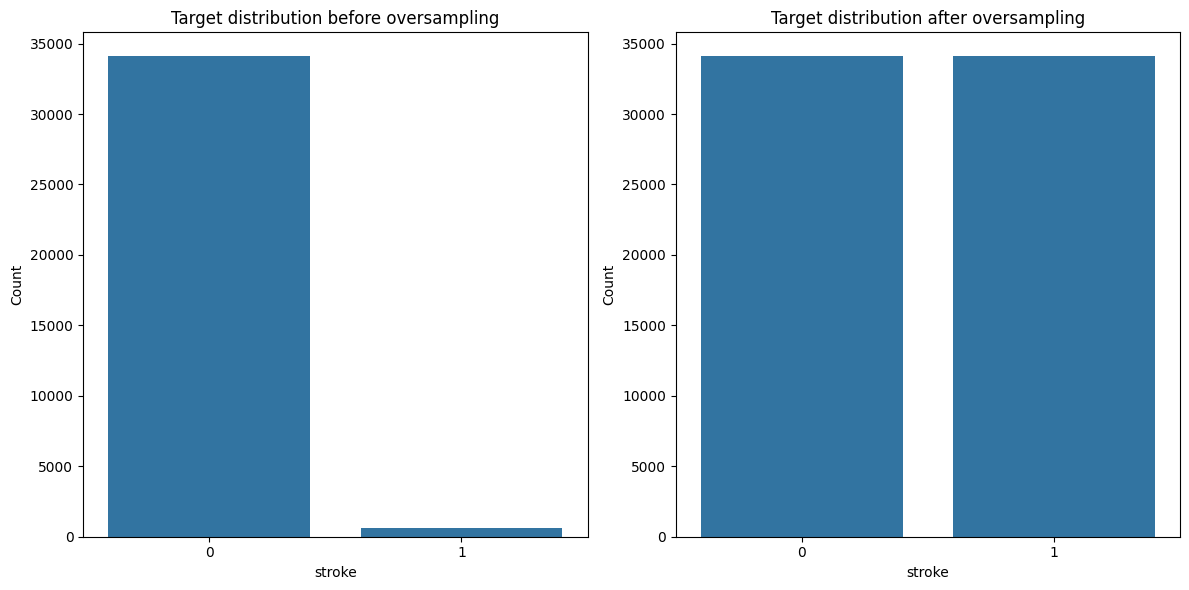

In [39]:
def plot_target_distribution(y_train, y_train_res):
    fig, axes = plt.subplots(1,2, figsize=(12,6))
    #Before oversampling
    sns.countplot(x=y_train, ax=axes[0])
    axes[0].set_title('Target distribution before oversampling')
    axes[0].set_xlabel('stroke')
    axes[0].set_ylabel('Count')
    #After Oversampling
    sns.countplot(x=y_train_res, ax=axes[1])
    axes[1].set_title('Target distribution after oversampling')
    axes[1].set_xlabel('stroke')
    axes[1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()
plot_target_distribution(y_train, y_train_res)

# Normalize the data

We need to normalize the data so that all the data can lie in between a particular range , like (0,1).

<Axes: title={'center': 'Before Scaling'}, ylabel='Density'>

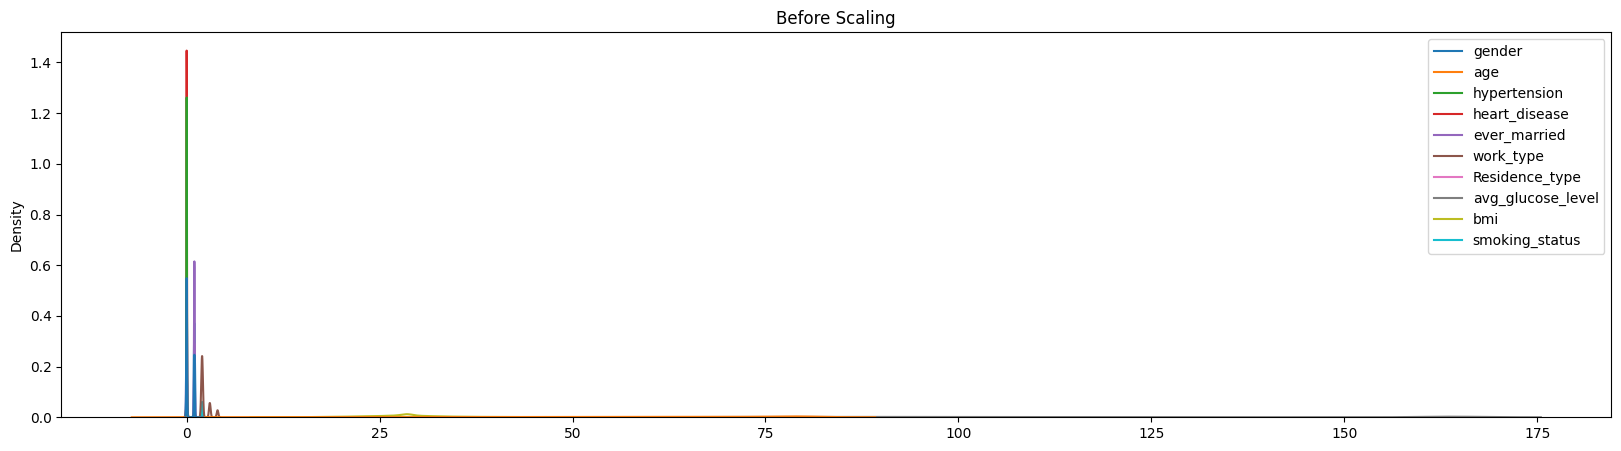

In [40]:
fig, (ax1) = plt.subplots(ncols = 1, figsize =(20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_res, ax = ax1)

In [41]:
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()

In [42]:
X_train_res[numerical_cols] = mn.fit_transform(X_train_res[numerical_cols])
X_test[numerical_cols] = mn.transform(X_test[numerical_cols])

<Axes: title={'center': 'After Scaling'}, ylabel='Density'>

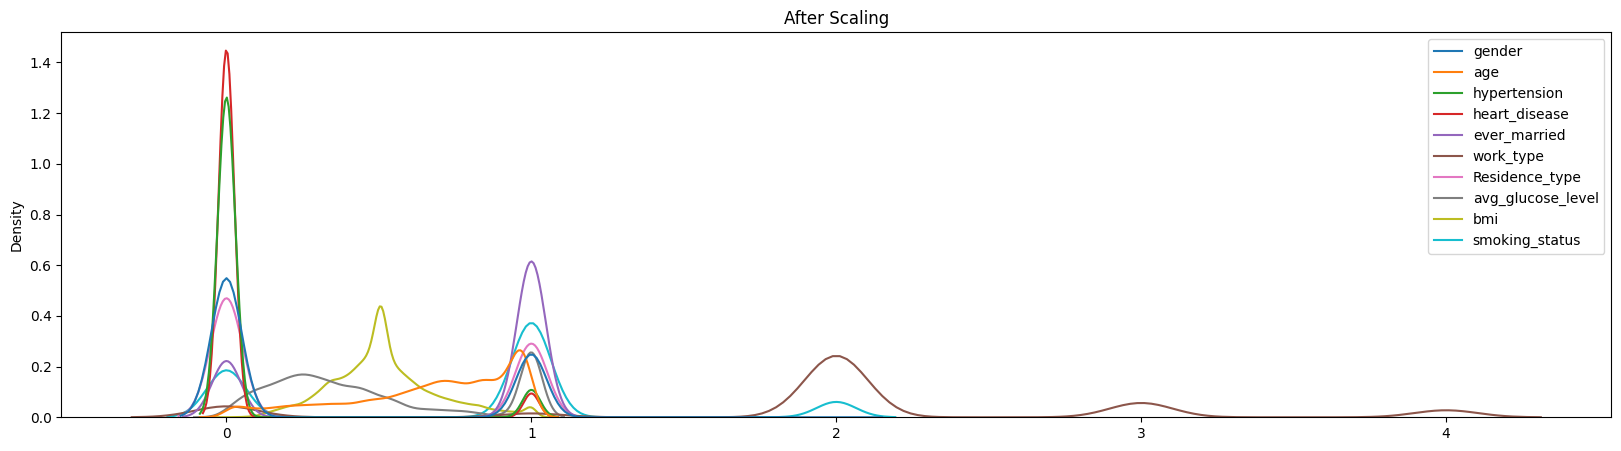

In [43]:
fig, (ax1) = plt.subplots(ncols = 1, figsize =(20, 5))
ax1.set_title('After Scaling')
sns.kdeplot(X_train_res, ax = ax1)

In [44]:
X_train_res.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
count,68188.000000,68188.000000,68188.000000,68188.000000,68188.000000,68188.000000,68188.000000,68188.000000,68188.000000,68188.000000
mean,0.311741,0.671850,0.078900,0.060905,0.734733,2.026427,0.382296,0.482812,0.516225,0.797956
std,0.463525,0.271263,0.269584,0.239158,0.441478,0.959444,0.485952,0.328845,0.171796,0.597552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.502113,0.000000,0.000000,0.000000,2.000000,0.000000,0.222202,0.412407,0.000000
50%,0.000000,0.731445,0.000000,0.000000,1.000000,2.000000,0.000000,0.382304,0.507065,1.000000
75%,1.000000,0.907345,0.000000,0.000000,1.000000,2.000000,1.000000,0.781392,0.598338,1.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000


# Model Training 
(Without feature selection)

In [45]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2, f_classif, RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


We will be using 5 different types of models here, and then evaluate their performance.
- Decision Trees Classifier
- Random Forest Classifier
- Logistic Regression 
- K Nearest Neighbors
- XGBoost

But without using feature selection, these do not perform well. As the percentage of minority class being predicted wrongly is very high in all cases.

Decision Tree Model:
Accuracy: 0.9326
Precision: 0.0408
Recall: 0.1210
F1 Score: 0.0610
Confusion Matrix:
[[8076  447]
 [ 138   19]]
Percentage of stroke cases predicted as no stroke: 87.90%


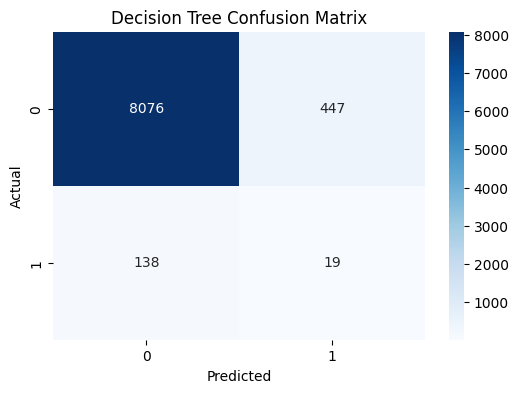

Random Forest Model:
Accuracy: 0.9522
Precision: 0.0582
Recall: 0.1083
F1 Score: 0.0757
Confusion Matrix:
[[8248  275]
 [ 140   17]]
Percentage of stroke cases predicted as no stroke: 89.17%


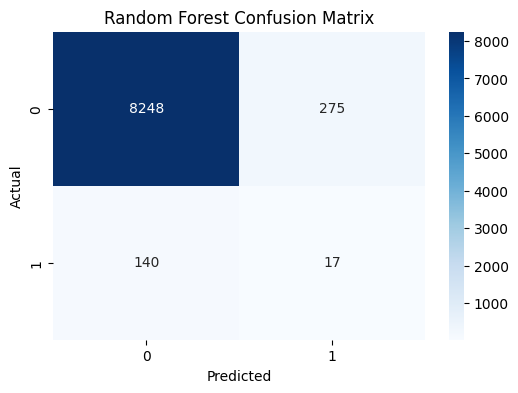

Logistic Regression Model:
Accuracy: 0.7848
Precision: 0.0495
Recall: 0.5987
F1 Score: 0.0914
Confusion Matrix:
[[6718 1805]
 [  63   94]]
Percentage of stroke cases predicted as no stroke: 40.13%


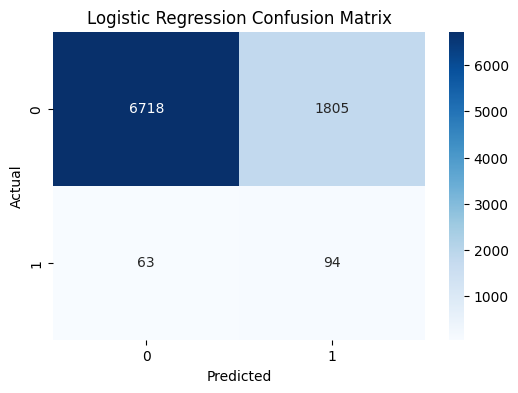

KNN Model:
Accuracy: 0.8790
Precision: 0.0458
Recall: 0.2866
F1 Score: 0.0789
Confusion Matrix:
[[7585  938]
 [ 112   45]]
Percentage of stroke cases predicted as no stroke: 71.34%


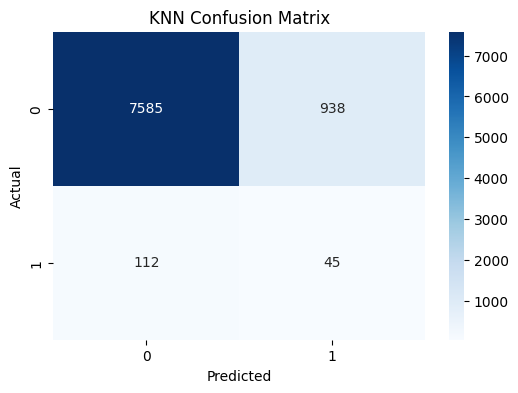

XGBoost Model:
Accuracy: 0.9265
Precision: 0.0521
Recall: 0.1783
F1 Score: 0.0807
Confusion Matrix:
[[8014  509]
 [ 129   28]]
Percentage of stroke cases predicted as no stroke: 82.17%


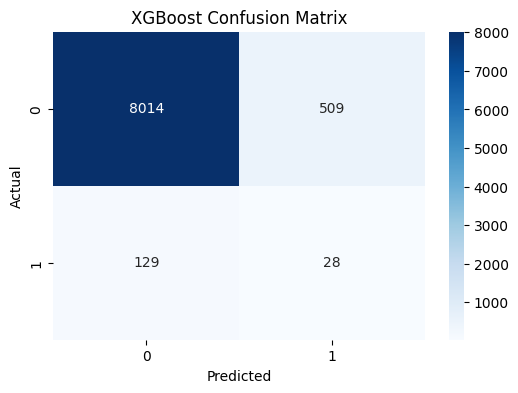

In [46]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    fn = cm[1, 0]
    actual_positive = cm[1, 0] + cm[1, 1]
    fn_rate = fn / actual_positive if actual_positive > 0 else 0

    print(f'{name} Model:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('Confusion Matrix:')
    print(cm)
    print(f'Percentage of stroke cases predicted as no stroke: {fn_rate * 100:.2f}%')
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [47]:
balanced_data = pd.concat([pd.DataFrame(X_train_res, columns=X.columns), pd.Series(y_train_res, name='stroke')], axis=1)
df=balanced_data.to_csv('balanced_data.csv', index=False)

In [48]:
X = balanced_data.drop(columns=['stroke'])
y = balanced_data['stroke']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(54550, 10)
(13638, 10)
(54550,)
(13638,)


Here we have created a new dataset by combining the data that we balanced using SMOTE. 
We will again check how are models work on this dataset.

Decision Tree Model:
Accuracy: 0.9542
Precision: 0.9464
Recall: 0.9645
F1 Score: 0.9554
Confusion Matrix:
[[6322  379]
 [ 246 6691]]
Percentage of stroke cases predicted as no stroke: 3.55%


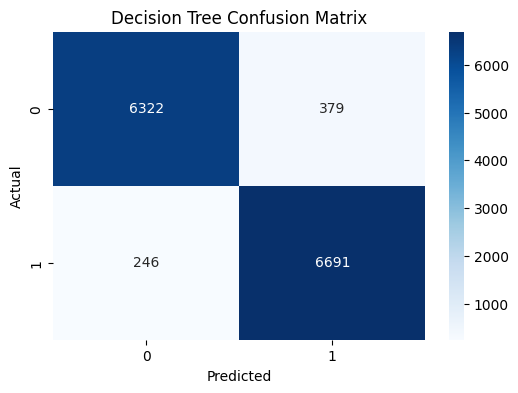

Random Forest Model:
Accuracy: 0.9760
Precision: 0.9672
Recall: 0.9863
F1 Score: 0.9767
Confusion Matrix:
[[6469  232]
 [  95 6842]]
Percentage of stroke cases predicted as no stroke: 1.37%


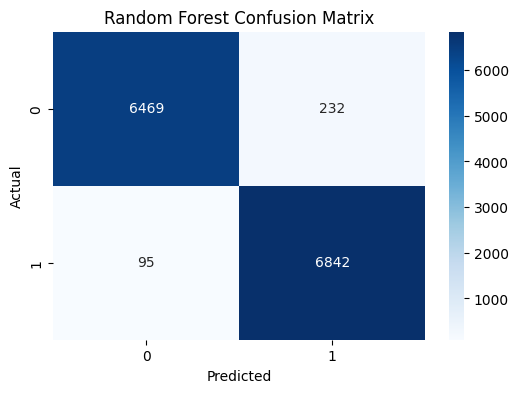

Logistic Regression Model:
Accuracy: 0.8099
Precision: 0.8057
Recall: 0.8251
F1 Score: 0.8153
Confusion Matrix:
[[5321 1380]
 [1213 5724]]
Percentage of stroke cases predicted as no stroke: 17.49%


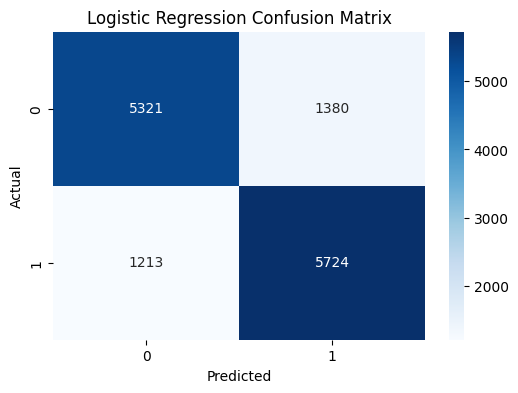

KNN Model:
Accuracy: 0.9339
Precision: 0.8934
Recall: 0.9880
F1 Score: 0.9383
Confusion Matrix:
[[5883  818]
 [  83 6854]]
Percentage of stroke cases predicted as no stroke: 1.20%


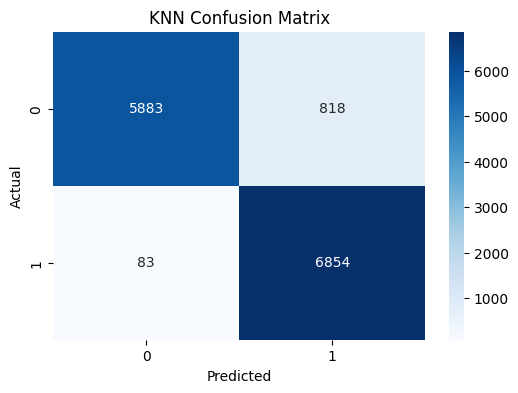

XGBoost Model:
Accuracy: 0.9530
Precision: 0.9438
Recall: 0.9651
F1 Score: 0.9543
Confusion Matrix:
[[6302  399]
 [ 242 6695]]
Percentage of stroke cases predicted as no stroke: 3.49%


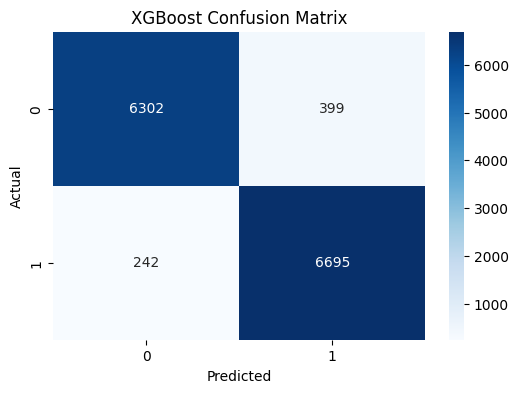

In [50]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    fn = cm[1, 0]
    actual_positive = cm[1, 0] + cm[1, 1]
    fn_rate = fn / actual_positive if actual_positive > 0 else 0

    print(f'{name} Model:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('Confusion Matrix:')
    print(cm)
    print(f'Percentage of stroke cases predicted as no stroke: {fn_rate * 100:.2f}%')
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Feature Selection

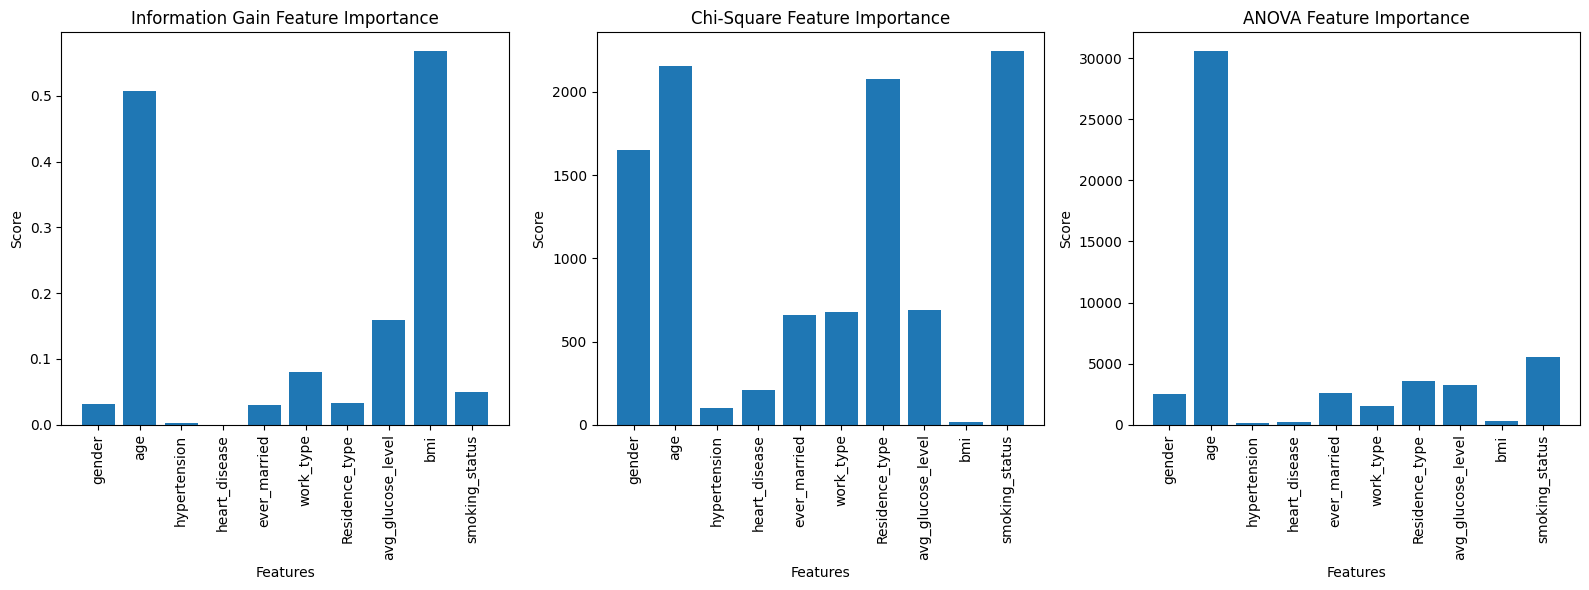

In [51]:
# Calculate feature importance using Information Gain
info_gain = mutual_info_classif(X_train, y_train)
# Calculate feature importance using Chi-Square
chi_scores, p_values = chi2(X_train, y_train)
# Calculate feature importance using ANOVA
anova_f, anova_p = f_classif(X_train, y_train)

# Plot feature importance scores
methods = {'Information Gain': info_gain, 'Chi-Square': chi_scores, 'ANOVA': anova_f}

plt.figure(figsize=(16, 6))
for i, (name, scores) in enumerate(methods.items(), start=1):
    plt.subplot(1, 3, i)
    plt.bar(range(len(scores)), scores)
    plt.title(f'{name} Feature Importance')
    plt.xlabel('Features')
    plt.ylabel('Score')
    plt.xticks(range(len(scores)), X.columns, rotation=90)

plt.tight_layout()
plt.show()

Using top 7 features selected by Information Gain
Decision Tree Model with Information Gain Selection:
Accuracy: 0.9529
Precision: 0.9469
Recall: 0.9614
F1 Score: 0.9541
Confusion Matrix:
[[6327  374]
 [ 268 6669]]
Percentage of stroke cases predicted as no stroke: 3.86%


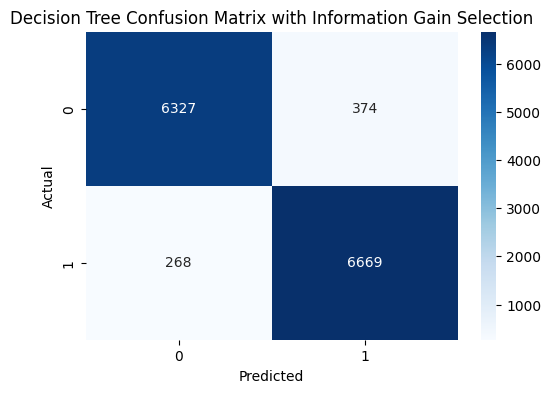

Random Forest Model with Information Gain Selection:
Accuracy: 0.9710
Precision: 0.9611
Recall: 0.9827
F1 Score: 0.9718
Confusion Matrix:
[[6425  276]
 [ 120 6817]]
Percentage of stroke cases predicted as no stroke: 1.73%


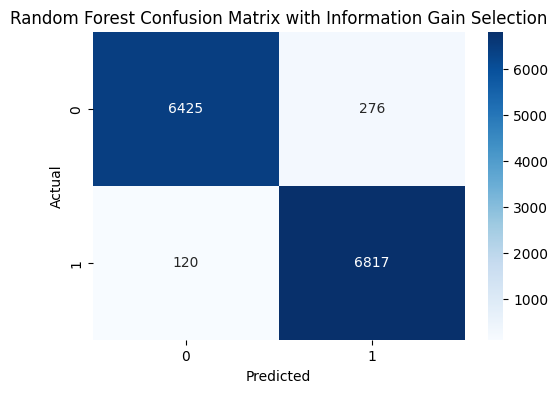

Logistic Regression Model with Information Gain Selection:
Accuracy: 0.8008
Precision: 0.7927
Recall: 0.8237
F1 Score: 0.8079
Confusion Matrix:
[[5207 1494]
 [1223 5714]]
Percentage of stroke cases predicted as no stroke: 17.63%


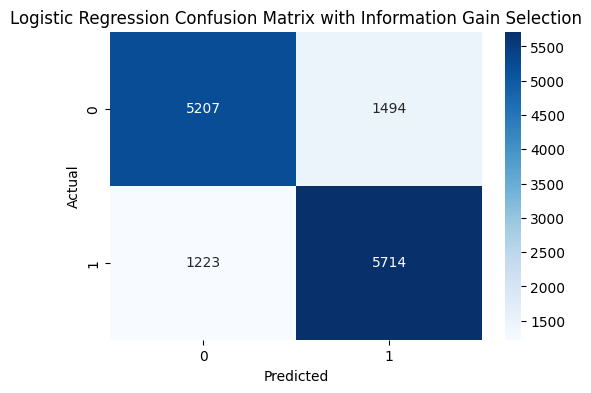

KNN Model with Information Gain Selection:
Accuracy: 0.9311
Precision: 0.8890
Recall: 0.9879
F1 Score: 0.9358
Confusion Matrix:
[[5845  856]
 [  84 6853]]
Percentage of stroke cases predicted as no stroke: 1.21%


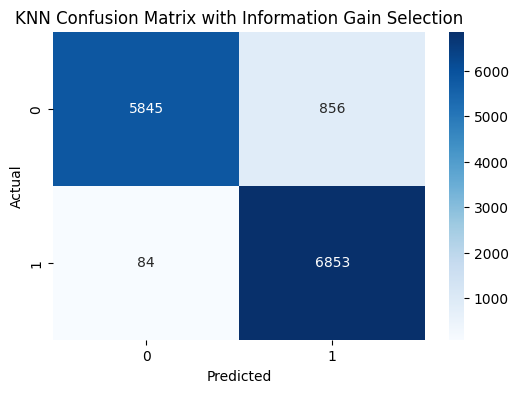

XGBoost Model with Information Gain Selection:
Accuracy: 0.9505
Precision: 0.9432
Recall: 0.9605
F1 Score: 0.9518
Confusion Matrix:
[[6300  401]
 [ 274 6663]]
Percentage of stroke cases predicted as no stroke: 3.95%


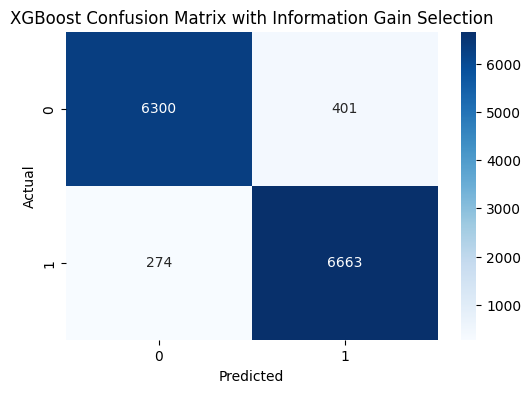

Using top 7 features selected by Chi-Square
Decision Tree Model with Chi-Square Selection:
Accuracy: 0.9601
Precision: 0.9579
Recall: 0.9640
F1 Score: 0.9609
Confusion Matrix:
[[6407  294]
 [ 250 6687]]
Percentage of stroke cases predicted as no stroke: 3.60%


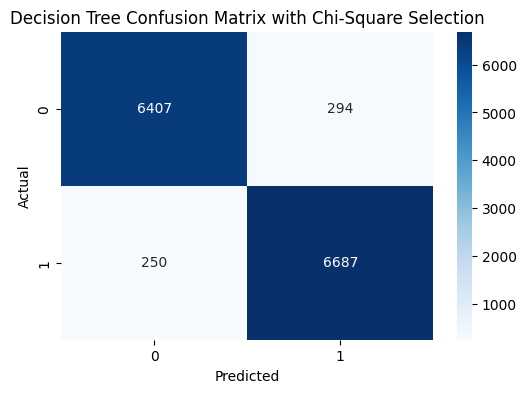

Random Forest Model with Chi-Square Selection:
Accuracy: 0.9590
Precision: 0.9532
Recall: 0.9668
F1 Score: 0.9600
Confusion Matrix:
[[6372  329]
 [ 230 6707]]
Percentage of stroke cases predicted as no stroke: 3.32%


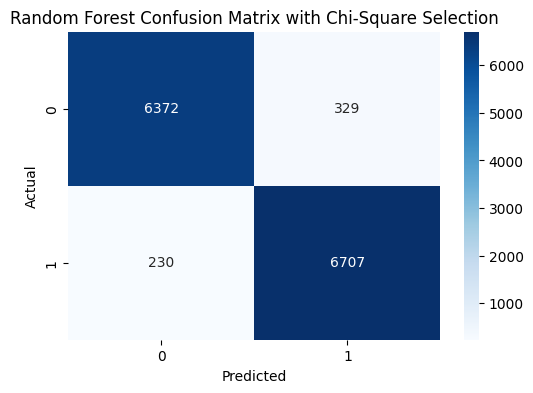

Logistic Regression Model with Chi-Square Selection:
Accuracy: 0.8033
Precision: 0.7983
Recall: 0.8205
F1 Score: 0.8093
Confusion Matrix:
[[5263 1438]
 [1245 5692]]
Percentage of stroke cases predicted as no stroke: 17.95%


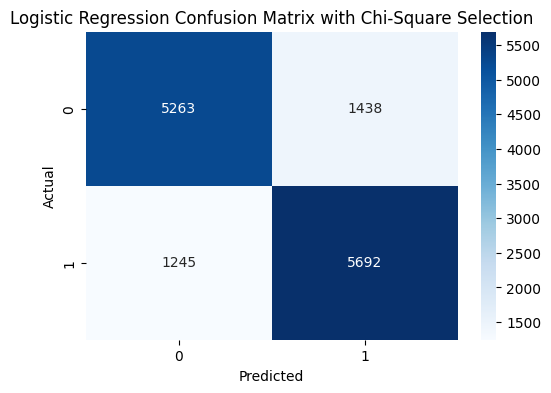

KNN Model with Chi-Square Selection:
Accuracy: 0.9265
Precision: 0.8973
Recall: 0.9660
F1 Score: 0.9304
Confusion Matrix:
[[5934  767]
 [ 236 6701]]
Percentage of stroke cases predicted as no stroke: 3.40%


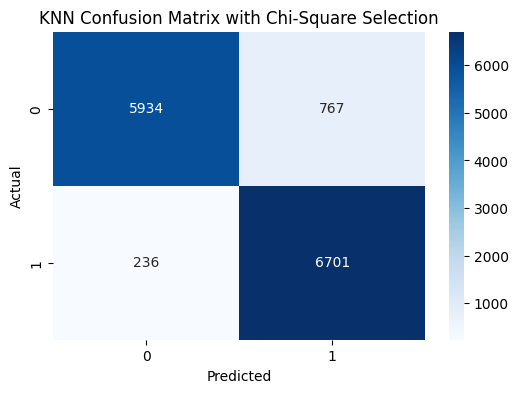

XGBoost Model with Chi-Square Selection:
Accuracy: 0.9356
Precision: 0.9362
Recall: 0.9373
F1 Score: 0.9368
Confusion Matrix:
[[6258  443]
 [ 435 6502]]
Percentage of stroke cases predicted as no stroke: 6.27%


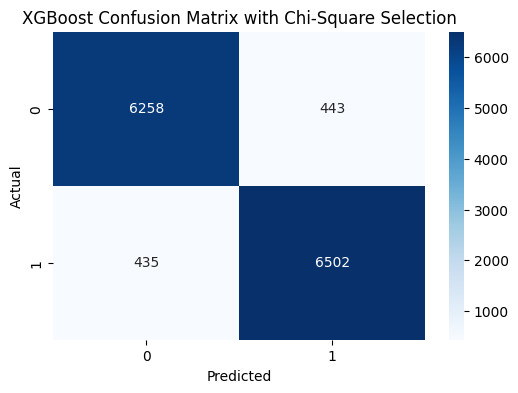

Using top 7 features selected by ANOVA
Decision Tree Model with ANOVA Selection:
Accuracy: 0.9597
Precision: 0.9572
Recall: 0.9638
F1 Score: 0.9605
Confusion Matrix:
[[6402  299]
 [ 251 6686]]
Percentage of stroke cases predicted as no stroke: 3.62%


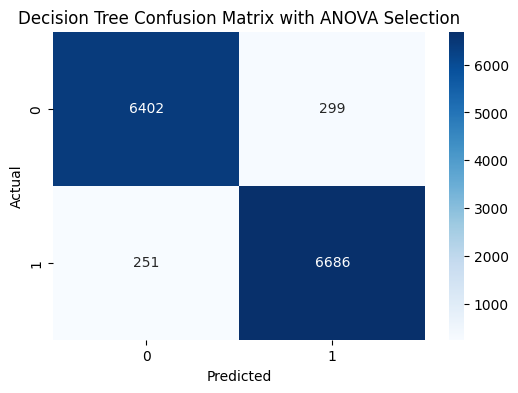

Random Forest Model with ANOVA Selection:
Accuracy: 0.9594
Precision: 0.9535
Recall: 0.9673
F1 Score: 0.9604
Confusion Matrix:
[[6374  327]
 [ 227 6710]]
Percentage of stroke cases predicted as no stroke: 3.27%


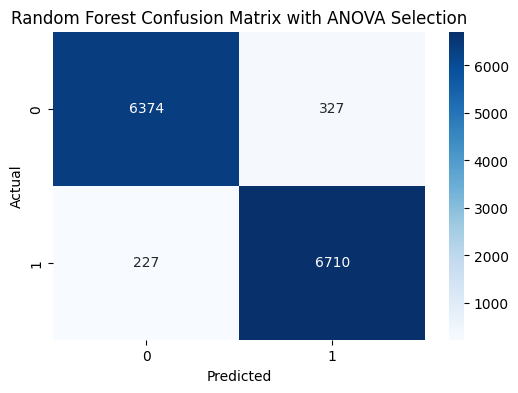

Logistic Regression Model with ANOVA Selection:
Accuracy: 0.8033
Precision: 0.7983
Recall: 0.8205
F1 Score: 0.8093
Confusion Matrix:
[[5263 1438]
 [1245 5692]]
Percentage of stroke cases predicted as no stroke: 17.95%


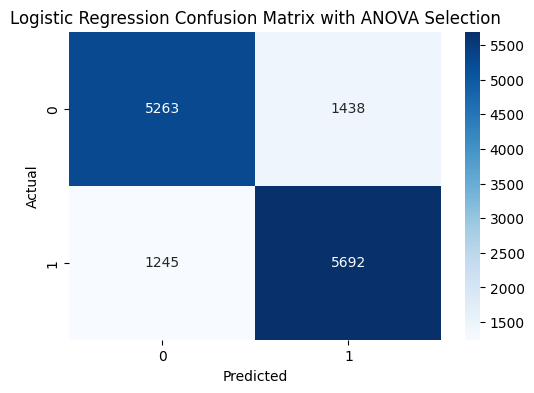

KNN Model with ANOVA Selection:
Accuracy: 0.9265
Precision: 0.8973
Recall: 0.9660
F1 Score: 0.9304
Confusion Matrix:
[[5934  767]
 [ 236 6701]]
Percentage of stroke cases predicted as no stroke: 3.40%


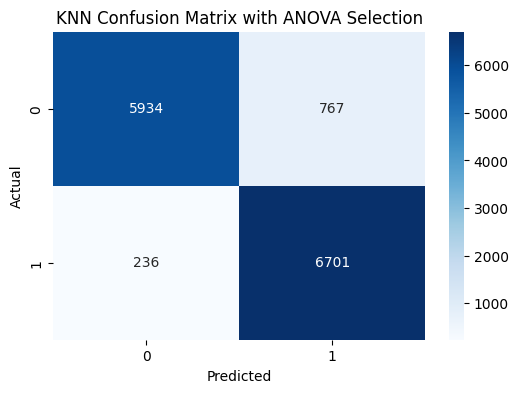

XGBoost Model with ANOVA Selection:
Accuracy: 0.9356
Precision: 0.9362
Recall: 0.9373
F1 Score: 0.9368
Confusion Matrix:
[[6258  443]
 [ 435 6502]]
Percentage of stroke cases predicted as no stroke: 6.27%


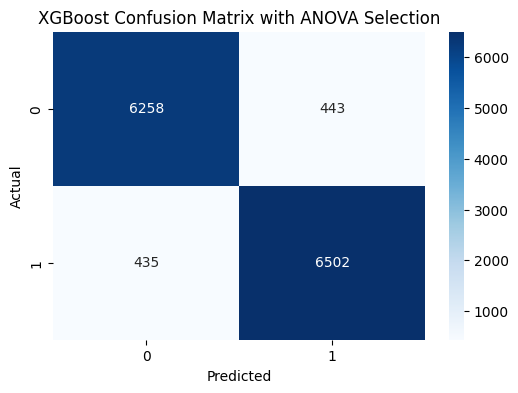

In [57]:
from sklearn.pipeline import Pipeline

# Number of top features to select
k = 7

# Define pipelines for each selection method and retrain models
for name, selection_method in methods.items():
    print(f'Using top {k} features selected by {name}')
    
    selector = SelectKBest(score_func=lambda X, y: selection_method, k=k)
    
    for model_name, model in models.items():
        pipeline = Pipeline([
            ('selector', selector),
            ('classifier', model)
        ])
        
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        
        fn = cm[1, 0]
        actual_positive = cm[1, 0] + cm[1, 1]
        fn_rate = fn / actual_positive if actual_positive > 0 else 0
        
        print(f'{model_name} Model with {name} Selection:')
        print(f'Accuracy: {accuracy:.4f}')
        print(f'Precision: {precision:.4f}')
        print(f'Recall: {recall:.4f}')
        print(f'F1 Score: {f1:.4f}')
        print('Confusion Matrix:')
        print(cm)
        print(f'Percentage of stroke cases predicted as no stroke: {fn_rate * 100:.2f}%')
        
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'{model_name} Confusion Matrix with {name} Selection')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()


In [53]:
from sklearn.model_selection import cross_val_score

best_model = RandomForestClassifier()  
selector = SelectKBest(score_func=mutual_info_classif, k=5) 
pipeline = Pipeline([
    ('selector', selector),
    ('classifier', best_model)
])

scores = cross_val_score(pipeline, X, y, cv=10, scoring='f1')
print(f'10-Fold Cross-Validation F1 Scores: {scores}')
print(f'Mean F1 Score: {scores.mean():.4f}')


KeyboardInterrupt: 

# Conclusion

**Random Forest Classifier** with features selected through **Information Gain** works the best , with a testing accuracy of 97.02% .  
Also the percentage of predicting minority classes wrongly is very less, about 2%. 